# Predicting Ljubljana' s real estate prizes
## Coursera EDA Project

First we will import all the necessary libraries needed for data preprocessing and visualisation

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print(tf.__version__)

2.3.0


Data is from a website called nepremičnine.net and it was web scrapped.

In [2]:
!ls *csv

generated_file.csv  lj.csv


In [3]:
df = pd.read_csv('lj.csv', delimiter ='|' )
df.head()

,title,offer_type,desc,size,price,gradnja,adaptacija
0,Ne spreglejte,trisobno,"74,5 m2, 3-sobno, zgrajeno l. 1964, adaptirano...","74,50 m2","890,00 €/mesec",1964.0,2020.0
1,Ne spreglejte,trisobno,"77 m2, 3-sobno, zgrajeno l. 1969, adaptirano l...","77,00 m2","750,00 €/mesec",1969.0,2015.0
2,Ne spreglejte,dvosobno,"60 m2, 2-sobno, zgrajeno l. 1935, adaptirano l...","60,00 m2","850,00 €/mesec",1935.0,2018.0
3,"BEŽIGRAJSKI DVOR, PERIČEVA ULICA 1",enosobno,"28 m2, 1-sobno, zgrajeno l. 1950, adaptirano l...","28,00 m2","400,00 €/mesec",1950.0,2007.0
4,BIZOVIK,trisobno,"100 m2, 3-sobno, zgrajeno l. 1977, adaptirano ...","100,00 m2","750,00 €/mesec",1977.0,2020.0


In [4]:
df.count()

title         1067
offer_type    1067
desc          1067
size          1067
price         1067
gradnja        914
adaptacija     626
dtype: int64

In [5]:
df['gradnja'].isnull().sum()

153

In [6]:
df['adaptacija'].isnull().sum()

441

In [7]:
df.dtypes

title          object
offer_type     object
desc           object
size           object
price          object
gradnja       float64
adaptacija    float64
dtype: object

In [8]:
df.shape

(1067, 7)

In [9]:
index_names = df[df['title'] == 'Ne spreglejte' ].index 
df.drop(index_names, inplace = True) 
df.head()

,title,offer_type,desc,size,price,gradnja,adaptacija
3,"BEŽIGRAJSKI DVOR, PERIČEVA ULICA 1",enosobno,"28 m2, 1-sobno, zgrajeno l. 1950, adaptirano l...","28,00 m2","400,00 €/mesec",1950.0,2007.0
4,BIZOVIK,trisobno,"100 m2, 3-sobno, zgrajeno l. 1977, adaptirano ...","100,00 m2","750,00 €/mesec",1977.0,2020.0
5,BIZOVIK,petsobno,"105,5 m2, 5 in večsobno, zgrajeno l. 2005, odd...","105,50 m2","1.500,00 €/mesec",2005.0,NaN
6,BRDO,Soba,"15 m2, soba, zgrajena l. 1970, adaptirana l. 2...","15,00 m2","250,00 €/mesec",1970.0,2003.0
7,BRDO,Soba,"15 m2, soba, zgrajena l. 2002, adaptirana l. 2...","15,00 m2","200,00 €/mesec",2002.0,2020.0


In [10]:
df.reset_index(drop=True)

,title,offer_type,desc,size,price,gradnja,adaptacija
0,"BEŽIGRAJSKI DVOR, PERIČEVA ULICA 1",enosobno,"28 m2, 1-sobno, zgrajeno l. 1950, adaptirano l...","28,00 m2","400,00 €/mesec",1950.0,2007.0
1,BIZOVIK,trisobno,"100 m2, 3-sobno, zgrajeno l. 1977, adaptirano ...","100,00 m2","750,00 €/mesec",1977.0,2020.0
2,BIZOVIK,petsobno,"105,5 m2, 5 in večsobno, zgrajeno l. 2005, odd...","105,50 m2","1.500,00 €/mesec",2005.0,NaN
3,BRDO,Soba,"15 m2, soba, zgrajena l. 1970, adaptirana l. 2...","15,00 m2","250,00 €/mesec",1970.0,2003.0
4,BRDO,Soba,"15 m2, soba, zgrajena l. 2002, adaptirana l. 2...","15,00 m2","200,00 €/mesec",2002.0,2020.0
...,...,...,...,...,...,...,...
1059,"ZUPANČIČEVA JAMA, AVČINOVA UL. 12",Soba,"14 m2, soba, v stavbi zgrajeni l. 1996, adapti...","14,00 m2","200,00 €/mesec",1996.0,2014.0
1060,"ZUPANČIČEVA JAMA, YPSILON",dvosobno,"66,4 m2, 2-sobno, zgrajeno l. 2018, 2/6 nad., ...","66,40 m2","780,00 €/mesec",2018.0,NaN
1061,"ZUPANČIČEVA JAMA, YPSILON",triinpolsobno,"111 m2, 3,5-sobno, dupleks, zgrajeno l. 2018, ...","111,00 m2","1.800,00 €/mesec",2018.0,NaN
1062,"ZUPANČIČEVA JAMA, ŽELEZNA CESTA 10A",dvosobno,"50 m2, 2-sobno, zgrajeno l. 2005, VP/7 nad., o...","50,00 m2","850,00 €/mesec",2005.0,NaN


# Room factor

In [11]:
df['offer_type'].describe()

count         1064
unique          13
top       trisobno
freq           228
Name: offer_type, dtype: object

As we can see offer_type is a categorical column which we will tranform into a numerical, but first we have to redo all the data, since there is no innate connection between 'oneroom' and 1 for computers. We will look at all the possible options and rename them accordingly. 

In [12]:
df['offer_type'].unique()

array(['enosobno', 'trisobno', 'petsobno', 'Soba', 'dvosobno',
       'dvoinpolsobno', 'garsonjera', 'štirisobno', 'enoinpolsobno',
       'triinpolsobno', 'Apartma', 'Drugo', 'štiriinpolsobno'],
      dtype=object)

In [13]:
index_names = df[df['offer_type'] == 'Drugo' ].index 
df.drop(index_names, inplace = True) 
df.head()

,title,offer_type,desc,size,price,gradnja,adaptacija
3,"BEŽIGRAJSKI DVOR, PERIČEVA ULICA 1",enosobno,"28 m2, 1-sobno, zgrajeno l. 1950, adaptirano l...","28,00 m2","400,00 €/mesec",1950.0,2007.0
4,BIZOVIK,trisobno,"100 m2, 3-sobno, zgrajeno l. 1977, adaptirano ...","100,00 m2","750,00 €/mesec",1977.0,2020.0
5,BIZOVIK,petsobno,"105,5 m2, 5 in večsobno, zgrajeno l. 2005, odd...","105,50 m2","1.500,00 €/mesec",2005.0,NaN
6,BRDO,Soba,"15 m2, soba, zgrajena l. 1970, adaptirana l. 2...","15,00 m2","250,00 €/mesec",1970.0,2003.0
7,BRDO,Soba,"15 m2, soba, zgrajena l. 2002, adaptirana l. 2...","15,00 m2","200,00 €/mesec",2002.0,2020.0


In [14]:
add = 2 

df.loc[df['offer_type'] == 'enosobno', 'offer_type'] = 1 + add
df.loc[df['offer_type'] == 'dvosobno', 'offer_type'] = 2 + add
df.loc[df['offer_type'] == 'trisobno', 'offer_type'] = 3 + add
df.loc[df['offer_type'] == 'štirisobno', 'offer_type'] = 4 + add
df.loc[df['offer_type'] == 'Soba', 'offer_type'] = 0 + add
df.loc[df['offer_type'] == 'enoinpolsobno', 'offer_type'] = 1.5 + add
df.loc[df['offer_type'] == 'dvoinpolsobno', 'offer_type'] = 2.5 + add
df.loc[df['offer_type'] == 'štiriinpolsobno', 'offer_type'] = 4.5 + add
df.loc[df['offer_type'] == 'triinpolsobno', 'offer_type'] = 3.5 + add
df.loc[df['offer_type'] == 'garsonjera', 'offer_type'] = 3.5 + add
df.loc[df['offer_type'] == 'petsobno', 'offer_type'] = 5 + add
df.loc[df['offer_type'] == 'Apartma', 'offer_type'] = 0 + add
df.head()

,title,offer_type,desc,size,price,gradnja,adaptacija
3,"BEŽIGRAJSKI DVOR, PERIČEVA ULICA 1",3,"28 m2, 1-sobno, zgrajeno l. 1950, adaptirano l...","28,00 m2","400,00 €/mesec",1950.0,2007.0
4,BIZOVIK,5,"100 m2, 3-sobno, zgrajeno l. 1977, adaptirano ...","100,00 m2","750,00 €/mesec",1977.0,2020.0
5,BIZOVIK,7,"105,5 m2, 5 in večsobno, zgrajeno l. 2005, odd...","105,50 m2","1.500,00 €/mesec",2005.0,NaN
6,BRDO,2,"15 m2, soba, zgrajena l. 1970, adaptirana l. 2...","15,00 m2","250,00 €/mesec",1970.0,2003.0
7,BRDO,2,"15 m2, soba, zgrajena l. 2002, adaptirana l. 2...","15,00 m2","200,00 €/mesec",2002.0,2020.0


In [15]:
df['offer_type'] = pd.to_numeric(df['offer_type'])
df.head()

,title,offer_type,desc,size,price,gradnja,adaptacija
3,"BEŽIGRAJSKI DVOR, PERIČEVA ULICA 1",3.0,"28 m2, 1-sobno, zgrajeno l. 1950, adaptirano l...","28,00 m2","400,00 €/mesec",1950.0,2007.0
4,BIZOVIK,5.0,"100 m2, 3-sobno, zgrajeno l. 1977, adaptirano ...","100,00 m2","750,00 €/mesec",1977.0,2020.0
5,BIZOVIK,7.0,"105,5 m2, 5 in večsobno, zgrajeno l. 2005, odd...","105,50 m2","1.500,00 €/mesec",2005.0,NaN
6,BRDO,2.0,"15 m2, soba, zgrajena l. 1970, adaptirana l. 2...","15,00 m2","250,00 €/mesec",1970.0,2003.0
7,BRDO,2.0,"15 m2, soba, zgrajena l. 2002, adaptirana l. 2...","15,00 m2","200,00 €/mesec",2002.0,2020.0


In [16]:
df = df.rename(columns={"title": "lokacija", "offer_type" : "room_factor"})
df.head()

,lokacija,room_factor,desc,size,price,gradnja,adaptacija
3,"BEŽIGRAJSKI DVOR, PERIČEVA ULICA 1",3.0,"28 m2, 1-sobno, zgrajeno l. 1950, adaptirano l...","28,00 m2","400,00 €/mesec",1950.0,2007.0
4,BIZOVIK,5.0,"100 m2, 3-sobno, zgrajeno l. 1977, adaptirano ...","100,00 m2","750,00 €/mesec",1977.0,2020.0
5,BIZOVIK,7.0,"105,5 m2, 5 in večsobno, zgrajeno l. 2005, odd...","105,50 m2","1.500,00 €/mesec",2005.0,NaN
6,BRDO,2.0,"15 m2, soba, zgrajena l. 1970, adaptirana l. 2...","15,00 m2","250,00 €/mesec",1970.0,2003.0
7,BRDO,2.0,"15 m2, soba, zgrajena l. 2002, adaptirana l. 2...","15,00 m2","200,00 €/mesec",2002.0,2020.0


## Location

In [17]:
df['lokacija'].astype('string')

3        BEŽIGRAJSKI DVOR, PERIČEVA ULICA 1
4                                   BIZOVIK
5                                   BIZOVIK
6                                      BRDO
7                                      BRDO
                       ...                 
1062      ZUPANČIČEVA JAMA, AVČINOVA UL. 12
1063              ZUPANČIČEVA JAMA, YPSILON
1064              ZUPANČIČEVA JAMA, YPSILON
1065    ZUPANČIČEVA JAMA, ŽELEZNA CESTA 10A
1066          ZUPANČIČEVA JAMA, ŽUPANČIČEVA
Name: lokacija, Length: 1060, dtype: string

In [18]:
df['lokacija'].unique()

array(['BEŽIGRAJSKI DVOR, PERIČEVA ULICA 1', 'BIZOVIK', 'BRDO',
       'BRDO, NOVA GRBINA', 'BRDO, ZELENI GAJ', 'BRINJE, BEŽIGRAD',
       'BROD', 'BROD, PIPANOVA POT 14', 'BROD, POD ŠMARNO GORO',
       'BROD, TACEN', 'BS 3', 'BS 3, BEŽIGRAD', 'BS 3, LJ. BEŽIGRAD',
       'BS 3, MAROLTOVA ULICA 2', 'BS 3, VOJKOVA 77',
       'BS 3, VOJKOVA CESTA', 'BS 3, VOJKOVA CESTA 91', 'BTC', 'ČRNUČE',
       'ČRNUČE, CENETA ŠTUPARJA', 'ČRNUČE, LJ.', 'ČRNUČE, POLANŠKOVA',
       'ČRNUČE, SREDNJE GAMELJNE', 'ČRNUŠKA GMAJNA',
       'ČRNUŠKA GMAJNA, ČRNUČE, POLANŠKOVA ULICA', 'DOBRUNJE',
       'DOLGI MOST', 'DOLGI MOST, NASELJE KOZARJE', 'DRAVELJSKA GMAJNA',
       'DRAVLJE', 'DRAVLJE, BLIZU DRAVELJSKE CERKVE',
       'DRAVLJE, BRILEJEVA - NASPROTI MERCATOR CENT',
       'DRAVLJE, KAMNOGORIŠKA CESTA', 'DRAVLJE, LJ. - DRAVELJSKA GMAJNA',
       'DRAVLJE, PILONOVA 8', 'DRAVLJE, UL. BRATOV BABNIK', 'FUŽINE',
       'FUŽINE, BRODARJEV TRG', 'FUŽINE, CHENGDUJSKA ULICA 24',
       'FUŽINE, OBNOVLJENO 202

In [19]:
df['lokacija'].str.replace('LJ.','')
df.head()

,lokacija,room_factor,desc,size,price,gradnja,adaptacija
3,"BEŽIGRAJSKI DVOR, PERIČEVA ULICA 1",3.0,"28 m2, 1-sobno, zgrajeno l. 1950, adaptirano l...","28,00 m2","400,00 €/mesec",1950.0,2007.0
4,BIZOVIK,5.0,"100 m2, 3-sobno, zgrajeno l. 1977, adaptirano ...","100,00 m2","750,00 €/mesec",1977.0,2020.0
5,BIZOVIK,7.0,"105,5 m2, 5 in večsobno, zgrajeno l. 2005, odd...","105,50 m2","1.500,00 €/mesec",2005.0,NaN
6,BRDO,2.0,"15 m2, soba, zgrajena l. 1970, adaptirana l. 2...","15,00 m2","250,00 €/mesec",1970.0,2003.0
7,BRDO,2.0,"15 m2, soba, zgrajena l. 2002, adaptirana l. 2...","15,00 m2","200,00 €/mesec",2002.0,2020.0


In [20]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_user_agent")
city ="Ljubljana"
country ="Slovenia"
loc = geolocator.geocode(city+','+ country)
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)

latitude is :- 46.0499803 
longtitude is:- 14.5068602


In [21]:
center = (loc.latitude, loc.longitude)
center

(46.0499803, 14.5068602)

In [22]:
df['lokacija'].isnull().sum()

0

In [23]:
from geopy.distance import great_circle
newport_ri = (41.49008, -71.312796)

cleveland_oh = (41.499498, -81.695391)
print(great_circle(newport_ri, cleveland_oh).km)

864.2144943393625


In [24]:
def create_tuple(x, number):
    loc = geolocator.geocode(x)
    if loc is not None:
        return (loc.latitude, loc.longitude)
    else:
        return (number, number)

In [25]:
dun_cesta = geolocator.geocode('DUNAJSKA CESTA')
print(great_circle(center, create_tuple(dun_cesta,5)))

0.9304784133255821 km


In [26]:
df.tail()

,lokacija,room_factor,desc,size,price,gradnja,adaptacija
1062,"ZUPANČIČEVA JAMA, AVČINOVA UL. 12",2.0,"14 m2, soba, v stavbi zgrajeni l. 1996, adapti...","14,00 m2","200,00 €/mesec",1996.0,2014.0
1063,"ZUPANČIČEVA JAMA, YPSILON",4.0,"66,4 m2, 2-sobno, zgrajeno l. 2018, 2/6 nad., ...","66,40 m2","780,00 €/mesec",2018.0,NaN
1064,"ZUPANČIČEVA JAMA, YPSILON",5.5,"111 m2, 3,5-sobno, dupleks, zgrajeno l. 2018, ...","111,00 m2","1.800,00 €/mesec",2018.0,NaN
1065,"ZUPANČIČEVA JAMA, ŽELEZNA CESTA 10A",4.0,"50 m2, 2-sobno, zgrajeno l. 2005, VP/7 nad., o...","50,00 m2","850,00 €/mesec",2005.0,NaN
1066,"ZUPANČIČEVA JAMA, ŽUPANČIČEVA",5.5,"139 m2, 3,5-sobno, zgrajeno l. 2005, 5/6 nad.,...","139,00 m2","1.400,00 €/mesec",2005.0,NaN


In [27]:
data_size = df.count()[0]
data_size

1060

In [28]:
#df = df.assign(latitude = lambda x: create_tuple(x, 5)[0])
#df = df.assign(longitude = lambda x: create_tuple(x, 5)[1])

In [29]:
df['latitude'] = df['lokacija'].apply(lambda x: create_tuple(x,46)[0])
df['longitude'] = df['lokacija'].apply(lambda x: create_tuple(x,14)[1])

In [30]:
df.drop('desc',inplace=True, axis=1)
df.head()

,lokacija,room_factor,size,price,gradnja,adaptacija,latitude,longitude
3,"BEŽIGRAJSKI DVOR, PERIČEVA ULICA 1",3.0,"28,00 m2","400,00 €/mesec",1950.0,2007.0,46.000000,14.000000
4,BIZOVIK,5.0,"100,00 m2","750,00 €/mesec",1977.0,2020.0,46.035486,14.567925
5,BIZOVIK,7.0,"105,50 m2","1.500,00 €/mesec",2005.0,NaN,46.035486,14.567925
6,BRDO,2.0,"15,00 m2","250,00 €/mesec",1970.0,2003.0,45.449571,13.759716
7,BRDO,2.0,"15,00 m2","200,00 €/mesec",2002.0,2020.0,45.449571,13.759716


(10, 20)

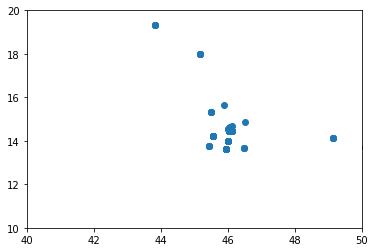

In [31]:
plt.scatter(df['latitude'],df['longitude'], label='Position')
axes = plt.gca()
axes.set_xlim([40,50])
axes.set_ylim([10,20])

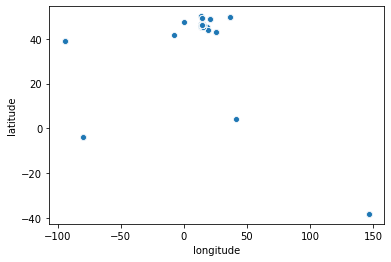

In [32]:
sns.scatterplot(df['longitude'], df['latitude'])

In [33]:
df['latitude'].describe()

count    1060.000000
mean       31.345949
std        24.967975
min       -38.197548
25%        -4.052851
50%        46.000000
75%        46.060013
max        50.103967
Name: latitude, dtype: float64

In [34]:
df.count()

lokacija       1060
room_factor    1060
size           1060
price          1060
gradnja         909
adaptacija      621
latitude       1060
longitude      1060
dtype: int64

In [35]:
df['latitude'].isnull().sum()

0

In [36]:
from sklearn.cluster import KMeans
lat, lon = df['latitude'], df['longitude']
lat = lat.to_numpy().reshape((-1,1))
lon = lon.to_numpy().reshape((-1,1))

In [37]:
X=df.loc[:,['latitude','longitude']]

In [38]:
clusters = 10
kmeans = KMeans(n_clusters=clusters)
kmeans.fit(X)

KMeans(n_clusters=10)

In [39]:
print(kmeans.labels_)

[0 0 0 ... 0 0 0]


In [40]:
print(type(kmeans.labels_))

<class 'numpy.ndarray'>


In [41]:
kmeans.cluster_centers_

array([[ 46.04874879,  14.24272256],
       [ -4.0528506 , -79.8053425 ],
       [-38.197548  , 146.5375551 ],
       [ 39.21241765, -94.53397894],
       [ 43.0820584 ,  25.6321312 ],
       [  4.2886254 ,  41.5168965 ],
       [ 49.992985  ,  36.230523  ],
       [ 48.6921841 ,  21.0078226 ],
       [ 44.62849583,  -3.75910989],
       [ 44.57513556,  18.59276162]])

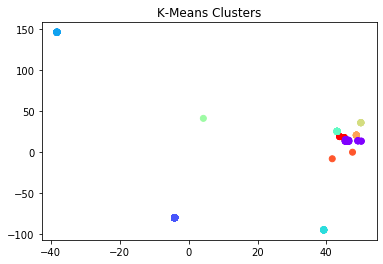

In [42]:
plt.scatter(df['latitude'],df['longitude'], c= kmeans.labels_, cmap='rainbow')
plt.title("K-Means Clusters")
plt.show()

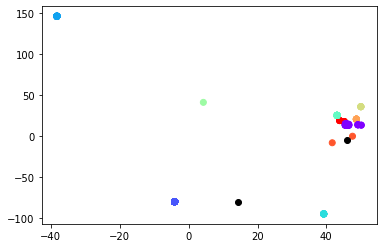

In [43]:
plt.scatter(df['latitude'], df['longitude'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[0], kmeans.cluster_centers_[1], color='black')
plt.show()

In [44]:
ed = pd.DataFrame(kmeans.labels_)
ed.dropna()
ed.describe()

,0
count,1060.000000
mean,0.652830
std,1.430889
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,9.000000


In [77]:
df['labels'] = ed
df.head()

,room_factor,size,price,gradnja,adaptacija,labels
0,3.0,8,400,70,13,0
1,5.0,100,750,43,0,0
2,7.0,105,1500,15,0,0
3,2.0,15,250,50,17,0
4,2.0,15,200,18,0,0


In [145]:
distances = []
for i in range(0,clusters-1):
    distance = great_circle(center, kmeans.cluster_centers_[i])
    print(distance)
    distances.append(distance)

5.821094976138486 km
10664.538533522522 km
16026.837031750589 km
4655.92697809215 km
8201.399773856612 km
940.105585818147 km
5326.152404331471 km
1667.4494256034438 km
1433.18751667491 km


In [146]:
for i in range(0,len(distances)-1):
    df['labels'] = df.loc[df.labels == i] = distances[i]

df.head()

,title,offer_type,desc,size,price,gradnja,adaptacija,labels
0,Ne spreglejte,trisobno,"74,5 m2, 3-sobno, zgrajeno l. 1964, adaptirano...","74,50 m2","890,00 €/mesec",1964,2020,1667.4494256034438 km
1,Ne spreglejte,trisobno,"77 m2, 3-sobno, zgrajeno l. 1969, adaptirano l...","77,00 m2","750,00 €/mesec",1969,2015,1667.4494256034438 km
2,Ne spreglejte,dvosobno,"60 m2, 2-sobno, zgrajeno l. 1935, adaptirano l...","60,00 m2","850,00 €/mesec",1935,2018,1667.4494256034438 km
3,"BEŽIGRAJSKI DVOR, PERIČEVA ULICA 1",enosobno,"28 m2, 1-sobno, zgrajeno l. 1950, adaptirano l...","28,00 m2","400,00 €/mesec",1950,2007,1667.4494256034438 km
4,BIZOVIK,trisobno,"100 m2, 3-sobno, zgrajeno l. 1977, adaptirano ...","100,00 m2","750,00 €/mesec",1977,2020,1667.4494256034438 km


In [307]:
def truncate(x, decimals):
    return (x*10**decimals)/10*decimals

In [46]:
df.reset_index()
print(great_circle(center, (df.at[150,'latitude'], df.at[150,'longitude'])))

1.2113615767197619 km


In [47]:
df.head()

,lokacija,room_factor,size,price,gradnja,adaptacija,latitude,longitude,labels
3,"BEŽIGRAJSKI DVOR, PERIČEVA ULICA 1",3.0,"28,00 m2","400,00 €/mesec",1950.0,2007.0,46.000000,14.000000,0.0
4,BIZOVIK,5.0,"100,00 m2","750,00 €/mesec",1977.0,2020.0,46.035486,14.567925,0.0
5,BIZOVIK,7.0,"105,50 m2","1.500,00 €/mesec",2005.0,NaN,46.035486,14.567925,0.0
6,BRDO,2.0,"15,00 m2","250,00 €/mesec",1970.0,2003.0,45.449571,13.759716,0.0
7,BRDO,2.0,"15,00 m2","200,00 €/mesec",2002.0,2020.0,45.449571,13.759716,0.0


## Size and price preprocessing

Again, size and price are string containing the values and units. First we will strip the columns of all data so we can transform them into numerical columns.

In [48]:
df['size'] = df['size'].str.strip(' m2')
df['price'] =df['price'].str.strip(' €/mesec')

df['size'] = df['size'].str.replace(',','.')

df['price'] = df['price'].str.replace('.','')
df['price'] = df['price'].str.replace(',00','')
df['price'] = df['price'].str.replace(' €/m2','')

df.head()

,lokacija,room_factor,size,price,gradnja,adaptacija,latitude,longitude,labels
3,"BEŽIGRAJSKI DVOR, PERIČEVA ULICA 1",3.0,8.00,400,1950.0,2007.0,46.000000,14.000000,0.0
4,BIZOVIK,5.0,100.00,750,1977.0,2020.0,46.035486,14.567925,0.0
5,BIZOVIK,7.0,105.50,1500,2005.0,NaN,46.035486,14.567925,0.0
6,BRDO,2.0,15.00,250,1970.0,2003.0,45.449571,13.759716,0.0
7,BRDO,2.0,15.00,200,2002.0,2020.0,45.449571,13.759716,0.0


In [49]:
len(df['size'].unique())

361

In [50]:
df['size'] = pd.to_numeric(df['size'])
df['price'] = pd.to_numeric(df['price'])

df.head()

,lokacija,room_factor,size,price,gradnja,adaptacija,latitude,longitude,labels
3,"BEŽIGRAJSKI DVOR, PERIČEVA ULICA 1",3.0,8.0,400,1950.0,2007.0,46.000000,14.000000,0.0
4,BIZOVIK,5.0,100.0,750,1977.0,2020.0,46.035486,14.567925,0.0
5,BIZOVIK,7.0,105.5,1500,2005.0,NaN,46.035486,14.567925,0.0
6,BRDO,2.0,15.0,250,1970.0,2003.0,45.449571,13.759716,0.0
7,BRDO,2.0,15.0,200,2002.0,2020.0,45.449571,13.759716,0.0


In [51]:
df.dtypes

lokacija        object
room_factor    float64
size           float64
price            int64
gradnja        float64
adaptacija     float64
latitude       float64
longitude      float64
labels         float64
dtype: object

## Gradnja in adaptacija

In [52]:
df.isnull().sum()

lokacija         0
room_factor      0
size             0
price            0
gradnja        151
adaptacija     439
latitude         0
longitude        0
labels           7
dtype: int64

In [53]:
def truncate(n):
    return int(n * 10) / 10

In [54]:
gradnja_median = df['gradnja'].median()
adapt_median = df['adaptacija'].median()

gradnja_median, adapt_median

(1977.0, 2017.0)

In [55]:
df = df.assign(perSquaredMeter = lambda x: (x['price'] /x['size'])) 
df['adaptacija'].fillna(method='pad',axis=0, inplace=True)
df['gradnja'].fillna(method='pad',axis=0, inplace=True)

df.head()

,lokacija,room_factor,size,price,gradnja,adaptacija,latitude,longitude,labels,perSquaredMeter
3,"BEŽIGRAJSKI DVOR, PERIČEVA ULICA 1",3.0,8.0,400,1950.0,2007.0,46.000000,14.000000,0.0,50.000000
4,BIZOVIK,5.0,100.0,750,1977.0,2020.0,46.035486,14.567925,0.0,7.500000
5,BIZOVIK,7.0,105.5,1500,2005.0,2020.0,46.035486,14.567925,0.0,14.218009
6,BRDO,2.0,15.0,250,1970.0,2003.0,45.449571,13.759716,0.0,16.666667
7,BRDO,2.0,15.0,200,2002.0,2020.0,45.449571,13.759716,0.0,13.333333


In [56]:
df['size'] = df['size'].apply(lambda x : round(x,1))

df['gradnja'] = df['gradnja'].astype('int')
df['adaptacija'] = df['adaptacija'].astype('int')
df['size'] = df['size'].astype('int')

df['perSquaredMeter'] = df['perSquaredMeter'].apply(lambda x : round(x,1))
df['adaptacija'] = df['adaptacija'].apply(lambda x: 2020 - x)

df.head()

,lokacija,room_factor,size,price,gradnja,adaptacija,latitude,longitude,labels,perSquaredMeter
3,"BEŽIGRAJSKI DVOR, PERIČEVA ULICA 1",3.0,8,400,1950,13,46.000000,14.000000,0.0,50.0
4,BIZOVIK,5.0,100,750,1977,0,46.035486,14.567925,0.0,7.5
5,BIZOVIK,7.0,105,1500,2005,0,46.035486,14.567925,0.0,14.2
6,BRDO,2.0,15,250,1970,17,45.449571,13.759716,0.0,16.7
7,BRDO,2.0,15,200,2002,0,45.449571,13.759716,0.0,13.3


In [57]:
df['gradnja'] = df['gradnja'].apply(lambda x: 2020 - x)

df.isnull().sum()

lokacija           0
room_factor        0
size               0
price              0
gradnja            0
adaptacija         0
latitude           0
longitude          0
labels             7
perSquaredMeter    0
dtype: int64

In [58]:
room_max = df['room_factor'].max()
size_max = df['size'].max()
gradnja_max = df['gradnja'].max()
adaptacija_max = df['adaptacija'].max()


#df['size'] = df['size'].apply(lambda x : x/size_max)
#df['room_factor'] = df['room_factor'].apply(lambda x : x/room_max)
#df['gradnja'] = df['gradnja'].apply(lambda x : x/gradnja_max)
#df['adaptacija'] = df['adaptacija'].apply(lambda x : x/adaptacija_max)


In [59]:
df.head()

,lokacija,room_factor,size,price,gradnja,adaptacija,latitude,longitude,labels,perSquaredMeter
3,"BEŽIGRAJSKI DVOR, PERIČEVA ULICA 1",3.0,8,400,70,13,46.000000,14.000000,0.0,50.0
4,BIZOVIK,5.0,100,750,43,0,46.035486,14.567925,0.0,7.5
5,BIZOVIK,7.0,105,1500,15,0,46.035486,14.567925,0.0,14.2
6,BRDO,2.0,15,250,50,17,45.449571,13.759716,0.0,16.7
7,BRDO,2.0,15,200,18,0,45.449571,13.759716,0.0,13.3


In [60]:
df['adaptacija'].max()

60

## Correlation

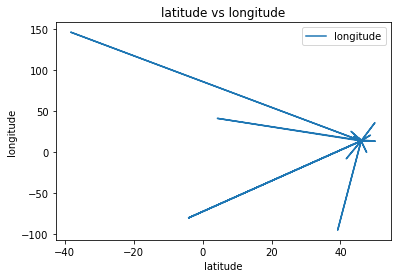

In [61]:
df.plot(x='latitude',y='longitude')
plt.xlabel("latitude")
plt.ylabel('longitude')
plt.legend()
plt.title("latitude vs longitude")
plt.show()

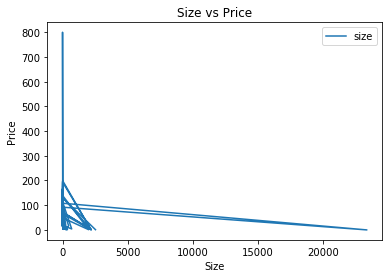

In [62]:
df.plot(x='perSquaredMeter',y='size')
plt.xlabel("Size")
plt.ylabel('Price')
plt.legend()
plt.title("Size vs Price")
plt.show()

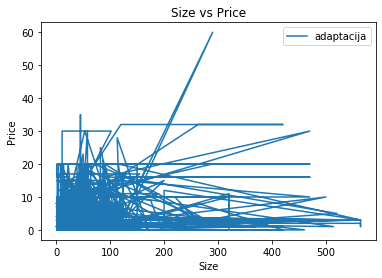

In [63]:
df.plot(x='gradnja',y='adaptacija')
plt.xlabel("Size")
plt.ylabel('Price')
plt.legend()
plt.title("Size vs Price")
plt.show()

In [64]:
corrmap = df.corr()
corrmap

,room_factor,size,price,gradnja,adaptacija,latitude,longitude,labels,perSquaredMeter
room_factor,1.000000,0.485472,0.574251,0.037892,-0.011488,-0.179685,-0.089063,-0.018586,0.084331
size,0.485472,1.000000,0.563543,0.093332,0.097227,-0.242963,-0.195081,-0.041403,-0.077210
price,0.574251,0.563543,1.000000,0.100078,0.037884,-0.265671,-0.165624,-0.052944,0.340071
gradnja,0.037892,0.093332,0.100078,1.000000,0.084989,-0.234754,-0.296122,-0.009658,0.012050
adaptacija,-0.011488,0.097227,0.037884,0.084989,1.000000,-0.032066,-0.023603,-0.098711,0.017859
latitude,-0.179685,-0.242963,-0.265671,-0.234754,-0.032066,1.000000,0.318829,-0.198016,0.018420
longitude,-0.089063,-0.195081,-0.165624,-0.296122,-0.023603,0.318829,1.000000,-0.028117,0.008694
labels,-0.018586,-0.041403,-0.052944,-0.009658,-0.098711,-0.198016,-0.028117,1.000000,-0.022223
perSquaredMeter,0.084331,-0.077210,0.340071,0.012050,0.017859,0.018420,0.008694,-0.022223,1.000000


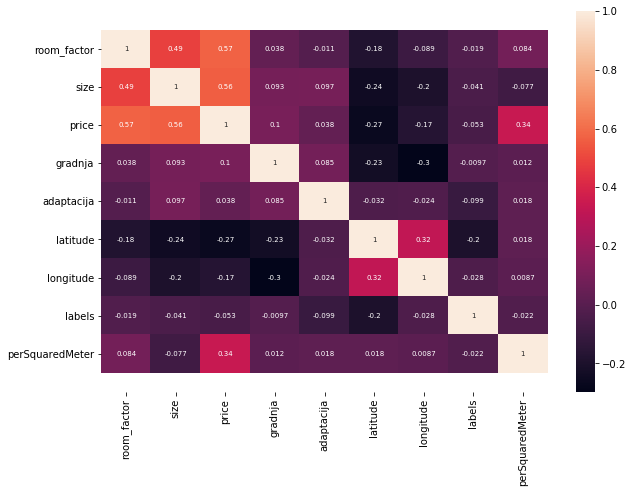

In [65]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.heatmap(corrmap, annot = True, annot_kws = {'size': 7})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-.5)
plt. show()

In [66]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
    df = pd.DataFrame(data = value, index=feature, columns=['corr value'])
    return df

In [67]:
corr_df = getCorrelatedFeature(corrmap['size'],0.5)
corr_df

,corr value
size,1.000000
price,0.563543


In [68]:
from scipy.stats import pearsonr
stat, p = pearsonr(df.room_factor, df.price)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.574, p=0.000
Probably dependent


In [69]:
stat, p = pearsonr(df.price, df.price)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=1.000, p=0.000
Probably dependent


## Getting ready for model training

In [89]:
#Y = df['price']
df.drop('index', axis=1, inplace=True)

In [90]:
#df.drop(['lokacija', 'latitude', 'longitude','perSquaredMeter','price'], inplace=True, axis=1)

In [91]:
#df.dropna(inplace = True, axis=1)


In [92]:
df.head()

,room_factor,size,gradnja,adaptacija,labels
0,3.0,8,70,13,0
1,5.0,100,43,0,0
2,7.0,105,15,0,0
3,2.0,15,50,17,0
4,2.0,15,18,0,0


In [93]:
df.dtypes

room_factor    float64
size             int64
gradnja          int64
adaptacija       int64
labels           int32
dtype: object

TODO: 
    - hyperparameter tuning

## Model training

In [ ]:
from tensorboard.plugins.hparams import api as hp

HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'RootMeanSquaredError'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
    hp.hparams_config(
        hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
        metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
    )

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1

def create_model(hparams):
    model = tf.keras.Sequential([
        Dense(512),
        Dense(128,activation='relu'),
        Dropout(0.2),
        Dense(hparams[HP_NUM_UNITS], activation='relu'),
        Dense(16,activation='relu'),    
        Dense(1)
    ])
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer = hparams[HP_OPTIMIZER], loss ='mae', metrics=['RootMeanSquaredError'])
    
    return model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,TensorBoard

checkpoint_best = .ModelCheckpoint('checkpoint', monitor='val_loss', save_freq='epoch', save_best_only=True)
early_stopper = EarlyStopping(monitor='val_loss', patience=10, mode='auto', min_delta = 0.001)
tensorboard = TensorBoard(histogram_freq=1)
hyperparameter = hp.KerasCallback(logdir, hparams)
cbs = [checkpoint_best,early_stopper, tensorboard, hyperparameter]

model = create_model(hparams)
history = model.fit(df,Y, validation_split=0.15, epochs=100, callbacks=cbs, shuffle = True, verbose=1)

In [ ]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
    
    for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
        for optimizer in HP_OPTIMIZER.domain.values:
              hparams = {
                  HP_NUM_UNITS: num_units,
                  HP_DROPOUT: dropout_rate,
                    HP_OPTIMIZER: optimizer,
                }
                run_name = "run-%d" % session_num
                print('--- Starting trial: %s' % run_name)
                print({h.name: hparams[h] for h in hparams})
                run('logs/hparam_tuning/' + run_name, hparams)
                session_num += 1

In [ ]:
%tensorboard --logdir logs/hparam_tuning

In [131]:
!ls checkpoint

assets	saved_model.pb	variables


In [138]:
df[2:5]

,room_factor,size,gradnja,adaptacija,labels
2,7.0,105,15,0,0
3,2.0,15,50,17,0
4,2.0,15,18,0,0


In [151]:
model.predict(df[2:5])

array([[1468.5427 ],
       [ 239.18153],
       [ 229.37875]], dtype=float32)

In [140]:
results = pd.DataFrame(history.history)
results.keys()

Index(['loss', 'root_mean_squared_error', 'val_loss',
       'val_root_mean_squared_error'],
      dtype='object')

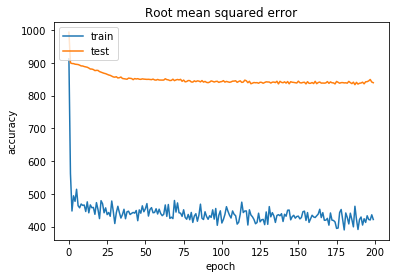

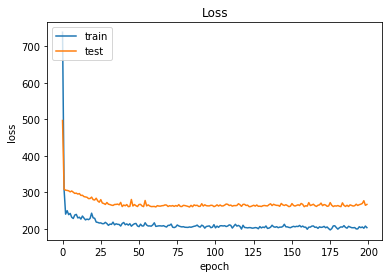

In [159]:
acc = results['root_mean_squared_error']
val_acc = results['val_root_mean_squared_error']
loss = results['loss']
val_loss = results['val_loss']


# Accuracy plots
plt.plot(acc)
plt.plot(val_acc)
plt.title('Root mean squared error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Loss plots
plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
lr_range = range(1e-3, 1e-6)
plt.plot(lr_range, loss)
plt.title("Learning rate per loss")
plt.legend(loc='upper left')
plt.show()

In [ ]:
%load_ext tensorboard

In [ ]:
!rm -rf ./logs/

The hypotesis for this data are :
1. Ho: there is strong corelation between offer_type and price.
there is no corelation between Y House price and distance the nearest MRT station
2. Ho : there is strong corelation between Y House price and size the number of size
store, H1 : there is no corelation between Y House price and distance the number of convinenet
store
3. Ho : there is strong corelation between Y House price and house age H1 : there is no corelation
between Y House price and house age
Testing the hypotesis using pearson corelation test

hp for learning rate

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [ ]:
#!python3 -m tensorboard.main --logdir="logs"

2020-10-26 08:22:14.906770: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2020-10-26 08:22:14.906801: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.3.0 at http://localhost:6007/ (Press CTRL+C to quit)
W1026 08:22:20.112598 140080425465600 checkpoint_management.py:295] FailedPreconditionError: checkpoint; Is a directory
W1026 08:22:20.112838 140080425465600 checkpoint_management.py:296] logs/../checkpoint: Checkpoint ignored
W1026 08:22:48.691108 140080636917504 checkpoint_management.py:295] FailedPreconditionError: checkpoint; Is a directory
W1026 08:22:48.691354 140080636917504 checkpoint_management.py:296] logs/../checkpoint: Checkpoint ignored


In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
!tensorboard dev upload --logdir \
    'logs'